In [4]:
library(tidyverse)
library(forecast)
library(repr) # Resizing the plots in jupyter
library(rugarch) 
library(readxl)
library(dynlm)
library(Hmisc)
library(gridExtra)

options(repr.plot.width=8, repr.plot.height=2)

# Spurious regression (WS 4.1)

In [41]:
n <- 1000
t <- c(1:n)

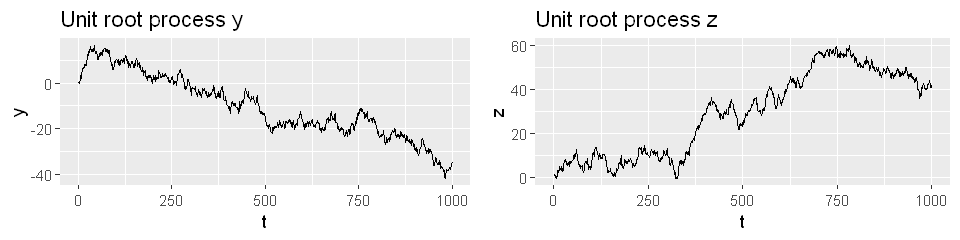

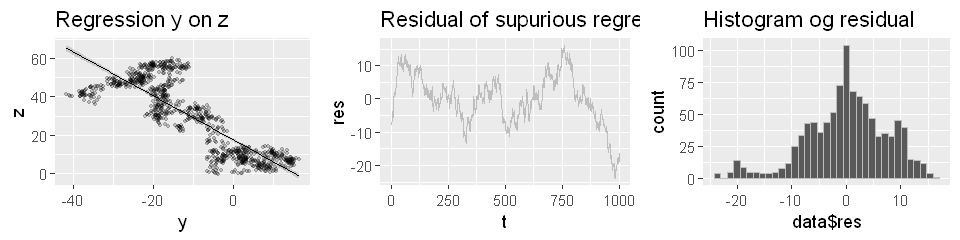

In [42]:
set.seed(4)
y <- cumsum(rnorm(n))
data <- data.frame(t, y)

p1 <- ggplot() + 
  geom_line(data=data, aes(t, y)) + 
  labs(title="Unit root process y")

set.seed(16)
data$z <- cumsum(rnorm(n))

p2 <- ggplot() + 
  geom_line(data=data, aes(t, z)) + 
  labs(title="Unit root process z")

p3 <- ggplot(data, aes(y,z)) + 
  geom_point(alpha=0.2, size=0.8) + 
  geom_smooth(method = "lm", size=0.5, color="black") + 
  labs(title="Regression y on z")

reg <- lm(y ~ z, data=data)
data$res <- resid(reg)

p4 <- ggplot() + 
  geom_line(data=data, aes(t, res), color="grey") +
  labs(title="Residual of supurious regression")

p5 <- ggplot() + 
  geom_histogram(aes(data$res), color="grey", bins=35)+
  labs(title="Histogram og residual")

grid.arrange(p1,p2, nrow=1)
grid.arrange(p3,p4,p5, nrow=1)

In [43]:
summary(reg)


Call:
lm(formula = y ~ z, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.0005  -4.3668   0.3076   4.8037  16.1560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.55514    0.43753   17.27   <2e-16 ***
z           -0.60891    0.01256  -48.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.445 on 998 degrees of freedom
Multiple R-squared:  0.7021,	Adjusted R-squared:  0.7018 
F-statistic:  2352 on 1 and 998 DF,  p-value: < 2.2e-16


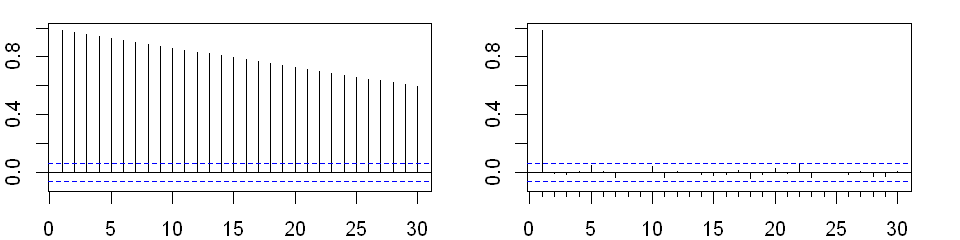

In [44]:
par(mfrow=c(1,2), mar=c(2,2,1,2))
Acf(data$res)
Pacf(data$res)
#auto.arima(data$res)

### CASE 1 - Both stationary

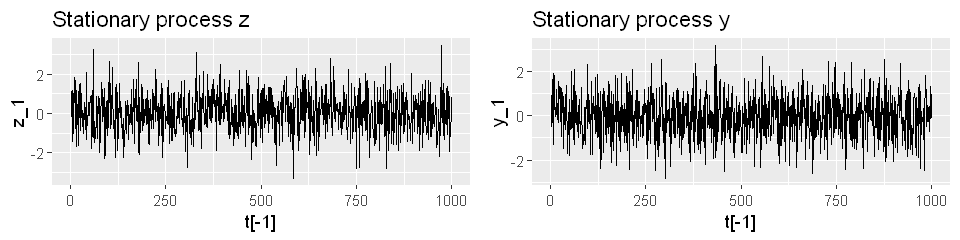

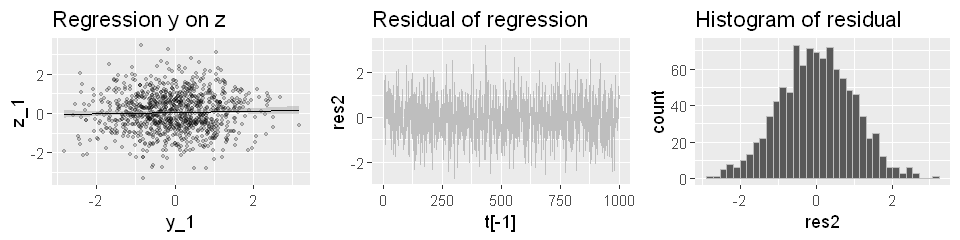

In [45]:
z_1 <- diff(data$z)

p1 <- ggplot() + 
  geom_line(aes(t[-1], z_1)) + 
  labs(title="Stationary process z")

y_1 <- diff(data$y)

p2 <- ggplot() + 
  geom_line(aes(t[-1], y_1)) + 
  labs(title="Stationary process y")

df <- data.frame(y_1, z_1)

p3 <- ggplot(df, aes(y_1,z_1)) + 
  geom_point(alpha=0.2, size=0.8) + 
  geom_smooth(method = "lm", size=0.5, color="black") + 
  labs(title="Regression y on z")

reg2 <- lm(y_1 ~ z_1)
res2 <- resid(reg2)

p4 <- ggplot() + 
  geom_line(aes(t[-1], res2), color="grey")+
  labs(title="Residual of regression")

p5 <- ggplot() + 
  geom_histogram(aes(res2), color="grey", bins=35)+
  labs(title="Histogram of residual")

grid.arrange(p1,p2, nrow=1)
grid.arrange(p3,p4,p5, nrow=1)

### CASE 2 - Integrated of different orders (meaningless)

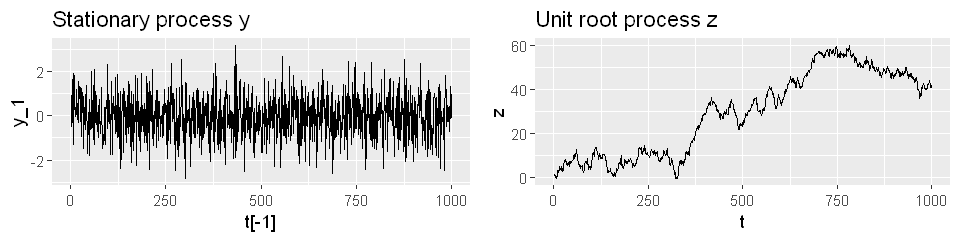

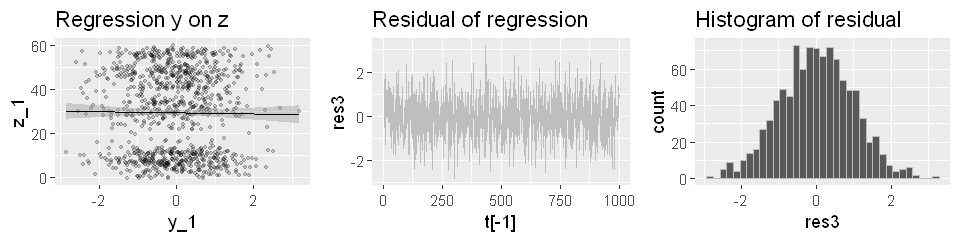

In [46]:
y_1 <- diff(data$y)
p1 <- ggplot() + 
  geom_line(aes(t[-1], y_1)) + 
  labs(title="Stationary process y")

p2 <- ggplot() + 
  geom_line(data=data, aes(t, z)) + 
  labs(title="Unit root process z")

df2 <- data.frame(y_1, z_1 = data$z[-1])

p3 <- ggplot(df2, aes(y_1, z_1)) + 
  geom_point(alpha=0.2, size=0.8) + 
  geom_smooth(method = "lm", size=0.5, color="black") +
  labs(title="Regression y on z")

reg3 <- lm(y_1 ~ z_1, data=df2)
res3 <- resid(reg3)

p4 <- ggplot() + 
  geom_line(aes(t[-1], res3), color="grey")+
  labs(title="Residual of regression")

p5 <- ggplot() + 
  geom_histogram(aes(res3), color="grey", bins=35)+
  labs(title="Histogram of residual")

grid.arrange(p1,p2, nrow=1)
grid.arrange(p3,p4,p5, nrow=1)

# Spurious regression with drift (WS 4.2)

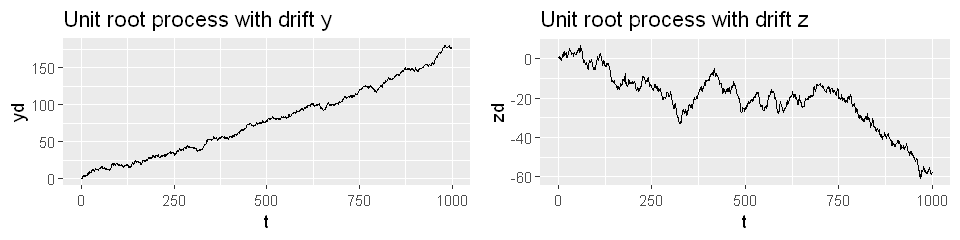

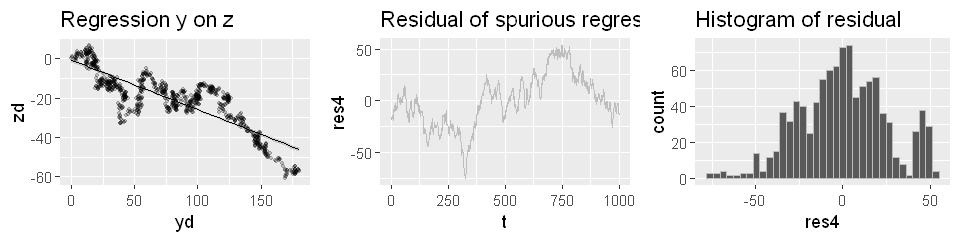

In [50]:
set.seed(6)
yd <- cumsum(rnorm(n) + 0.2)
data <- data.frame(t, yd)

p1 <- ggplot() + 
  geom_line(data=data, aes(t, yd)) + 
  labs(title="Unit root process with drift y")

set.seed(16)
data$zd <- cumsum(rnorm(n) - 0.1)

p2 <- ggplot() + 
  geom_line(data=data, aes(t, zd)) + 
  labs(title="Unit root process with drift z")

p3 <- ggplot(data, aes(yd,zd)) + 
  geom_point(alpha=0.2, size=0.8) + 
  geom_smooth(method = "lm", size=0.5, color="black") + 
  labs(title="Regression y on z")

reg4 <- lm(yd ~ zd, data=data)
res4 <- resid(reg4)

p4 <- ggplot() + 
  geom_line(aes(t, res4), color="grey")+
  labs(title="Residual of spurious regression")

p5 <- ggplot() + 
  geom_histogram(aes(res4), color="grey", bins=35)+
  labs(title="Histogram of residual")

grid.arrange(p1,p2, nrow=1)
grid.arrange(p3,p4,p5, nrow=1)